In [1]:
# R version 4.1.0 #
# Load packages: Seurat_4.1.1, RColorBrewer_1.1-3, ggplot2_3.3.6, extrafont_0.18, dplyr_1.0.9, tidyr_1.2.0, purrr_0.3.4
packages = c('Seurat','RColorBrewer','ggplot2','extrafont','dplyr','tidyr','purrr')
for (p in packages){
    suppressPackageStartupMessages(eval(bquote(library(.(p)))))
}

## define functions for plotting histograms
plot_umap1 <- function(seurat,ids,cols) {
    sub_seurat=subset(seurat,idents=ids)
    sub_seurat$cell.type <- droplevels(sub_seurat$cell.type)
    sampled.cells <- c()
    set.seed(111)
    for(id in levels(sub_seurat$cell.type)){
        sampled.cells <- c(sampled.cells,sample(x = names(subset(sub_seurat,idents=id)$cell.type), size = n_cells_per, replace = F))
    }
    umap_df <- data.frame(umap = subset(sub_seurat,cells=sampled.cells)$umap@cell.embeddings[,'UMAP_1'],type=subset(sub_seurat,cells=sampled.cells)$cell.type)
    umap_df$type <- factor(umap_df$type,levels=ids)
    umap_df2 <- umap_df %>%
      nest(-type) %>%
      mutate(density = map(data, ~density(.x$umap))) %>%
      mutate(density.x = map(density, ~.x[["x"]]),
             density.y = map(density, ~.x[["y"]])) %>%
      select(type, density.x, density.y) %>%
      unnest()
    options(repr.plot.width=4.2358, repr.plot.height=1.2)
    xmin = min(seurat$umap@cell.embeddings[,'UMAP_1'])-1
    xmax = max(seurat$umap@cell.embeddings[,'UMAP_1'])+1
    p <- ggplot(umap_df2,aes(x = density.x, y = density.y, color = type)) + geom_line(size=1)+theme_classic()+
    scale_color_manual(labels = c(''),values = cols,name='') + 
    scale_fill_manual(labels = c(''),values = alpha(cols,1),name='') +
    xlim(xmin,xmax) +
    theme(text=element_text(family= "Arial", size=12)) + 
    theme(axis.text.x=element_blank(), #remove x axis labels
        axis.text.y=element_blank(),  #remove y axis labels
        axis.ticks.y=element_blank(),  #remove y axis ticks
        legend.position = "none",
        axis.title.x=element_blank(),
        axis.title.y=element_blank()) 
    return(p)
}

plot_umap2 <- function(seurat,ids,cols) {
    sub_seurat=subset(seurat,idents=ids)
    sub_seurat$cell.type <- droplevels(sub_seurat$cell.type)
    sampled.cells <- c()
    set.seed(111)
    for(id in levels(sub_seurat$cell.type)){
        sampled.cells <- c(sampled.cells,sample(x = names(subset(sub_seurat,idents=id)$cell.type), size = n_cells_per, replace = F))
    }
    umap_df <- data.frame(umap = subset(sub_seurat,cells=sampled.cells)$umap@cell.embeddings[,'UMAP_2'],type=subset(sub_seurat,cells=sampled.cells)$cell.type)
    umap_df$type <- factor(umap_df$type,levels=ids)
    umap_df2 <- umap_df %>%
      nest(-type) %>%
      mutate(density = map(data, ~density(.x$umap))) %>%
      mutate(density.x = map(density, ~.x[["x"]]),
             density.y = map(density, ~.x[["y"]])) %>%
      select(type, density.x, density.y) %>%
      unnest()
    options(repr.plot.height=4.2358, repr.plot.width=1.2)
    xmin = min(seurat$umap@cell.embeddings[,'UMAP_2'])-1
    xmax = max(seurat$umap@cell.embeddings[,'UMAP_2'])+1
    p <- ggplot(umap_df2,aes(x = density.x, y = density.y, color = type)) + geom_line(size=1)+theme_classic()+
    scale_color_manual(labels = c(''),values = cols,name='') + 
    scale_fill_manual(labels = c(''),values = alpha(cols,1),name='') +
    xlim(xmin,xmax) +
    theme(text=element_text(family= "Arial", size=12)) + 
    theme(axis.text.x=element_blank(), #remove x axis labels
        axis.text.y=element_blank(),  #remove y axis labels
        axis.ticks.x=element_blank(),  #remove y axis ticks
        legend.position = "none",
        axis.title.x=element_blank(),
        axis.title.y=element_blank()) + coord_flip()
    return(p)
}

In [2]:
seurat <- readRDS('source_data/from_GEO/ds_seurat_PCA_UMAP_clusters_ds38_min10_v4.rds') # download from GEO; also saved in seurat_ds38_min10_v4.R

# subset seurat object by cell types included in text up to this point
to_include = c('t1_2hr_WT_20210722','t1_20min_WT_20210722','t1_undil_WT_20210722',
               't2_20min_WT_20210722','t2_undil_WT_20210722','t3_undil_WT_20210722',
               't4_2hr_WT_20210722','t4_1hr_WT_20210722','t4_20min_WT_20210722','t4_undil_WT_20210722',
               't1_2hr_metG_20210623','t1_20min_metG_20210623','t1_undil_metG_20210623',
               't2_2hr_metG_20210623','t2_20min_metG_20210623','t2_undil_metG_20210623','t3_undil_metG_20210623',
               't4_2hr_metG_20210623','t4_20min_metG_20210623','t4_undil_metG_20210623',
               'WT_1hr_20220331','WT_30min_20220331','WT_10min_20220331','WT_3min_20220331','WT_stat_20220331',
               'metG6_20201018_1','metG5_20201018_1','metG4_20201018_1','metG3_20201018_1','metG2_20200926','metG1_20200926','WT_10min_20220210')
seurat@active.ident <- seurat$cell.type
seurat <- subset(seurat,idents=to_include)

Warning message:
“A numeric `legend.position` argument in `theme()` was deprecated in ggplot2 3.5.0.
ℹ Please use the `legend.position.inside` argument of `theme()` instead.”
Warning message:
“Supplying `...` without names was deprecated in tidyr 1.0.0.
ℹ Please specify a name for each selection.
ℹ Did you want `data = -type`?”
Warning message:
“`cols` is now required when using `unnest()`.
ℹ Please use `cols = c(density.x, density.y)`.”
Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“Removed 31 rows containing missing values or values outside the scale range (`geom_line()`).”


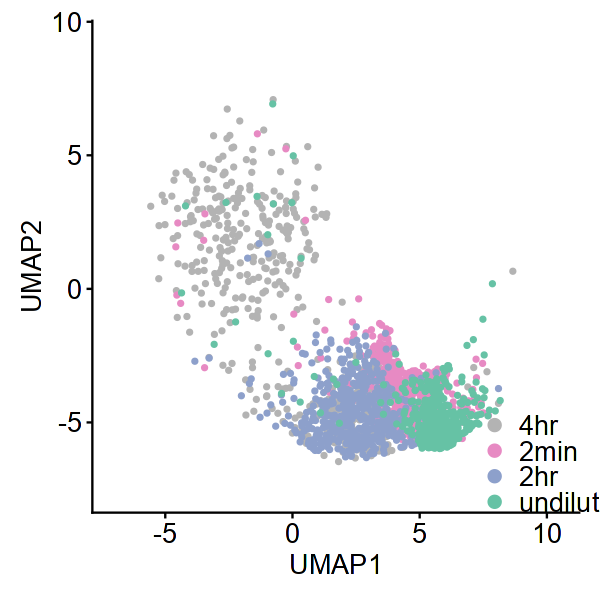

Warning message:
“Removed 31 rows containing missing values or values outside the scale range (`geom_line()`).”
Warning message:
“Supplying `...` without names was deprecated in tidyr 1.0.0.
ℹ Please specify a name for each selection.
ℹ Did you want `data = -type`?”
Warning message:
“`cols` is now required when using `unnest()`.
ℹ Please use `cols = c(density.x, density.y)`.”
Warning message:
“Removed 66 rows containing missing values or values outside the scale range (`geom_line()`).”


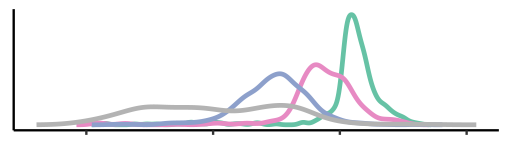

Warning message:
“Removed 66 rows containing missing values or values outside the scale range (`geom_line()`).”


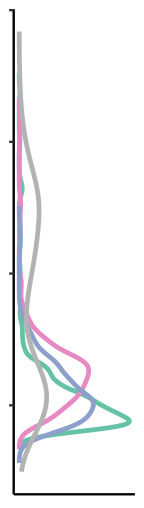

In [3]:
seurat@active.ident <- seurat$cell.type
options(repr.plot.width=5, repr.plot.height=5)
my_cols = brewer.pal(8,"Set2")
n_cells_per = 500
alpha = 1
pt.size = 1
xmin = min(seurat$umap@cell.embeddings[,'UMAP_1'])-1
xmax = max(seurat$umap@cell.embeddings[,'UMAP_1'])+1
ymin = min(seurat$umap@cell.embeddings[,'UMAP_2'])-1
ymax = max(seurat$umap@cell.embeddings[,'UMAP_2'])+1

ids = levels(seurat$cell.type)[(grepl('202010',levels(seurat$cell.type)))]

sub_seurat=subset(seurat,idents=ids)
sub_seurat$cell.type <- droplevels(sub_seurat$cell.type)
sampled.cells <- c()
set.seed(111)
for(id in levels(sub_seurat$cell.type)){
    if(id=='metG3_20201018_1'){
        sampled.cells <- c(sampled.cells,sample(x = names(subset(sub_seurat,idents=id)$cell.type), size = 500, replace = F))
    }
    else{
        sampled.cells <- c(sampled.cells,sample(x = names(subset(sub_seurat,idents=id)$cell.type), size = n_cells_per, replace = F))
    }
}
DimPlot(subset(sub_seurat,cells=sampled.cells),pt.size=pt.size,order=rev(c('metG6_20201018_1','metG4_20201018_1','metG5_20201018_1','metG3_20201018_1'))) +
    xlim(xmin,xmax) + ylim(ymin,ymax) +
    scale_color_manual(labels = rev(c("undiluted", "2hr","2min","4hr")), values = alpha(rev(my_cols[c(1,3,4,8)]),alpha))+ xlab('UMAP1') + ylab('UMAP2') +
    theme(text=element_text(family= "Arial", size=16),axis.text=element_text(family='Arial',size=16),legend.text=element_text(size=16),legend.position=c(0.8,0.1))

ggsave('figures/figED1d_umap.pdf',width = 5,height = 5)


cols = my_cols[c(1,4,3,8)]
ids = rev(c('metG6_20201018_1','metG5_20201018_1','metG4_20201018_1','metG3_20201018_1'))
plot_umap1(seurat,ids,cols)
ggsave('figures/figED1d_top.pdf',width = 4.2358,height = 1.2)

plot_umap2(seurat,ids,cols)
ggsave('figures/figED1d_right.pdf',height = 4.2358,width = 1.2)


Warning message:
“Supplying `...` without names was deprecated in tidyr 1.0.0.
ℹ Please specify a name for each selection.
ℹ Did you want `data = -type`?”
Warning message:
“`cols` is now required when using `unnest()`.
ℹ Please use `cols = c(density.x, density.y)`.”
Warning message:
“Removed 15 rows containing missing values or values outside the scale range (`geom_line()`).”


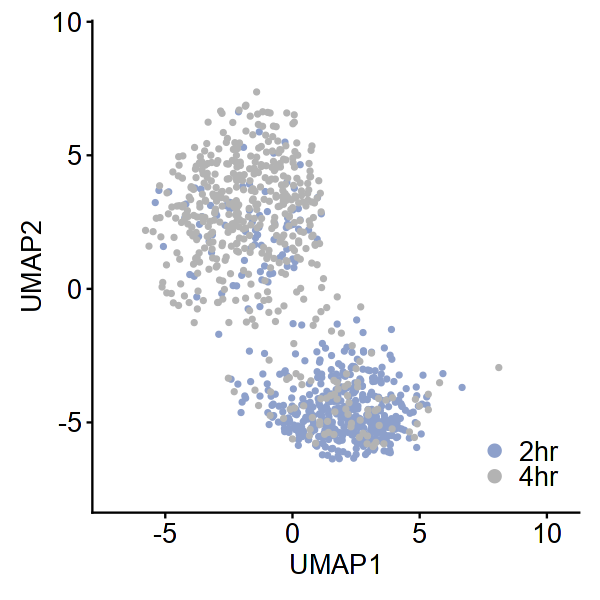

Warning message:
“Removed 15 rows containing missing values or values outside the scale range (`geom_line()`).”
Warning message:
“Supplying `...` without names was deprecated in tidyr 1.0.0.
ℹ Please specify a name for each selection.
ℹ Did you want `data = -type`?”
Warning message:
“`cols` is now required when using `unnest()`.
ℹ Please use `cols = c(density.x, density.y)`.”
Warning message:
“Removed 29 rows containing missing values or values outside the scale range (`geom_line()`).”


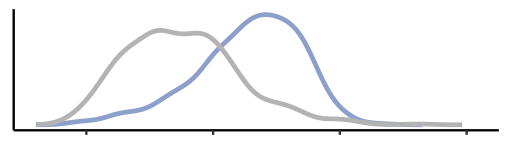

Warning message:
“Removed 29 rows containing missing values or values outside the scale range (`geom_line()`).”


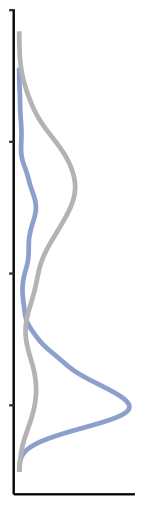

In [4]:
seurat@active.ident <- seurat$cell.type
options(repr.plot.width=5, repr.plot.height=5)
my_cols = brewer.pal(8,"Set2")
n_cells_per = 500
alpha = 1
pt.size = 1
xmin = min(seurat$umap@cell.embeddings[,'UMAP_1'])-1
xmax = max(seurat$umap@cell.embeddings[,'UMAP_1'])+1
ymin = min(seurat$umap@cell.embeddings[,'UMAP_2'])-1
ymax = max(seurat$umap@cell.embeddings[,'UMAP_2'])+1

ids = levels(seurat$cell.type)[(grepl('202009',levels(seurat$cell.type)))]

sub_seurat=subset(seurat,idents=ids)
sub_seurat$cell.type <- droplevels(sub_seurat$cell.type)
sampled.cells <- c()
set.seed(111)
for(id in levels(sub_seurat$cell.type)){
    sampled.cells <- c(sampled.cells,sample(x = names(subset(sub_seurat,idents=id)$cell.type), size = n_cells_per, replace = F))
}
DimPlot(subset(sub_seurat,cells=sampled.cells),pt.size=pt.size,order=c('metG2_20200926','metG1_20200926')) +
    xlim(xmin,xmax) + ylim(ymin,ymax) +
    scale_color_manual(labels = c("2hr","4hr"), values = alpha(my_cols[c(3,8)],alpha))+ xlab('UMAP1') + ylab('UMAP2') +
    theme(text=element_text(family= "Arial", size=16),axis.text=element_text(family='Arial',size=16),legend.text=element_text(size=16),legend.position=c(0.8,0.1))

ggsave('figures/figED1e_umap.pdf',width = 5,height = 5)

cols = my_cols[c(3,8)]
ids = rev(c('metG2_20200926','metG1_20200926'))
plot_umap1(seurat,ids,cols)
ggsave('figures/figED1e_top.pdf',width = 4.2358,height = 1.2)

plot_umap2(seurat,ids,cols)
ggsave('figures/figED1e_right.pdf',height = 4.2358,width = 1.2)


In [5]:
# load original seurat object, before downsampling 
seurat_preDS <- readRDS('source_data/from_GEO/seurat_full_with_CFT.rds') # download from GEO
counts <- GetAssayData(seurat_preDS, assay = "RNA")
counts <- counts[-(which(rownames(counts) %in% c('rRNA'))),]
seurat_preDS <- subset(seurat_preDS, features = rownames(counts))
seurat_preDS <- subset(seurat_preDS, subset = nCount_RNA > 0)


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message:
“Removed 1301 rows containing non-finite outside the scale range (`stat_ydensity()`).”
Warning message:
“Removed 1301 rows containing non-finite outside the scale range (`stat_ydensity()`).”



t4_undil_metG_20210623 t4_20min_metG_20210623   t4_2hr_metG_20210623 
                  2806                  13339                   8218 

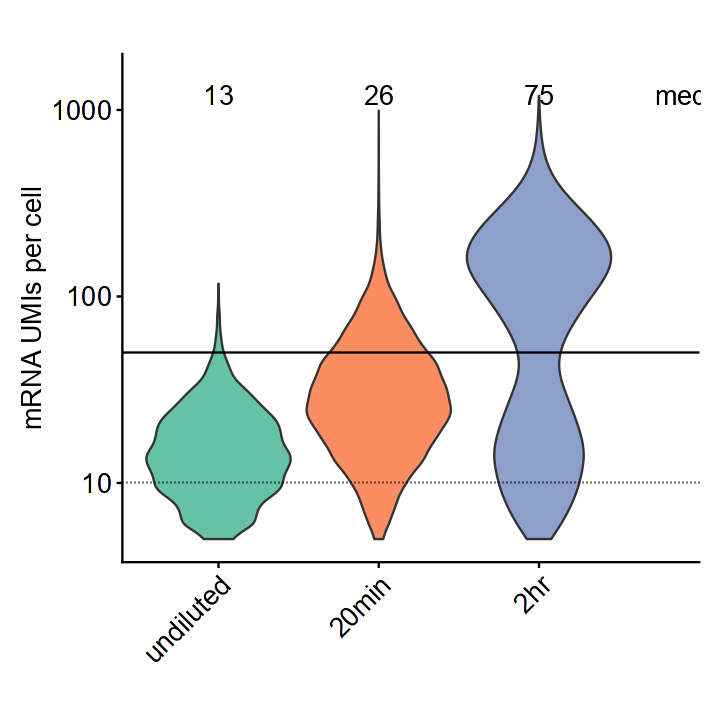

In [6]:
options(repr.plot.width=6, repr.plot.height=6)
my_cols = brewer.pal(7,"Set2")

seurat_preDS@active.ident <- seurat_preDS$cell.type
idents <- c('t4_undil_metG_20210623','t4_20min_metG_20210623','t4_2hr_metG_20210623')
sub_seurat <- subset(seurat_preDS,idents=idents)
sub_seurat$cell.type <- droplevels(sub_seurat$cell.type)
sub_seurat$cell.type <- factor(sub_seurat$cell.type,levels=idents)
sub_seurat@active.ident <- sub_seurat$cell.type

p <- VlnPlot(sub_seurat, features = c("nCount_RNA"),ncol = 1, log=FALSE,pt.size=0) + 
    theme(legend.position = "none") + 
    scale_y_log10(limits = c(5,1500))

x <- 1
for (ident in idents){
    med <- median(subset(sub_seurat, idents=c(ident))$nCount_RNA)
    p <- p + annotate("text",x=x, y=1200, label=med, size=16 / .pt, family="Arial")
    #p <- p + geom_text(x=x, y=3.1, label= table(seurat$cell.type)[ident],size=5)
    x <- x+1
}
p <- p + scale_fill_manual(labels=c("undiluted","20min","2hr"),values=alpha(my_cols[1:3],1))
p <- p + annotate("text",x=4, y=1200, label='median', size=16 / .pt, family="Arial")
# #p <- p + geom_text(x=7, y=3.1, label= 'n cells',size=5) + expand_limits(x = c(0,8))
p <- p + scale_x_discrete(breaks=idents,labels=c("undiluted","20min","2hr"))
p <- p + theme(text=element_text(family= "Arial", size=16),axis.text = element_text(family= "Arial", size=16,angle = 0,hjust=0.5))
p <- p + ylab("mRNA UMIs per cell") + xlab('') + ggtitle('')
p <- p + geom_hline(yintercept=50) + geom_hline(yintercept=10,linetype='dotted')
p

ggsave('figures/figED1f.pdf',width = 6,height = 6)

table(seurat$cell.type)[idents]

[1] 0.03007663
[1] 0.7398266


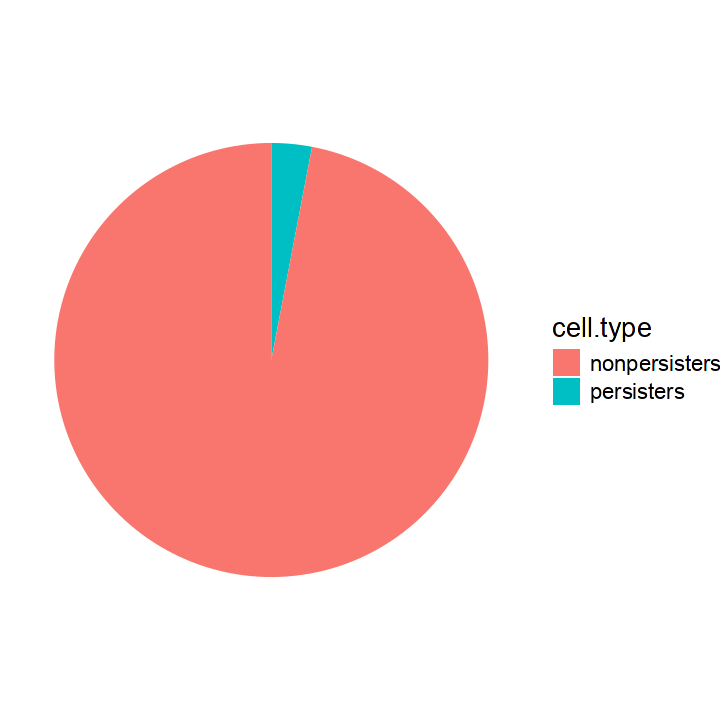

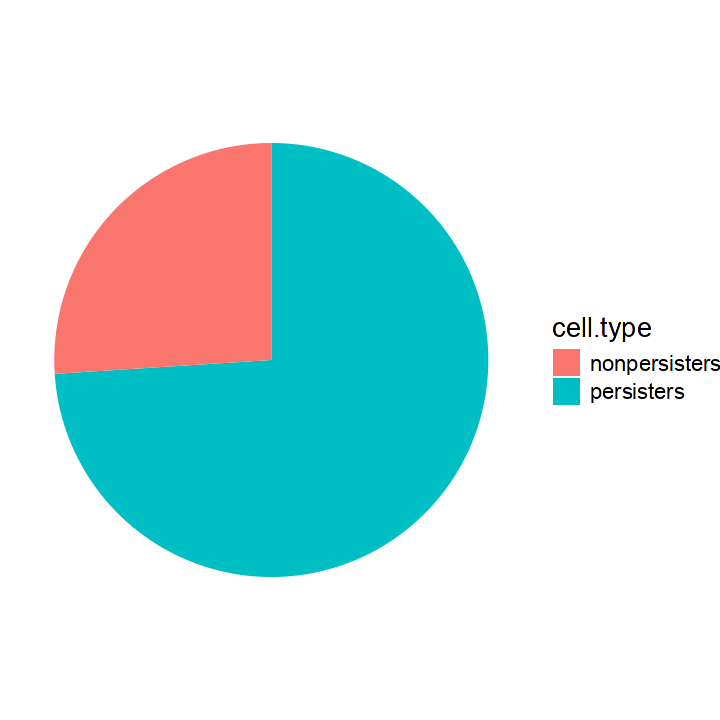

In [7]:
## find proportion of persisters above or below 50 mRNA UMIs ##
# seurat is the down-sampled clustered object; seurat_preDS is the seurat object before downsampling (has cell types, not clusters)

seurat@active.ident <- seurat$seurat_clusters
seurat_preDS@active.ident <- seurat_preDS$cell.type
idents <- c('t4_2hr_metG_20210623')
sub_seurat <- subset(seurat_preDS,idents=idents)
sub_seurat <- subset(sub_seurat,subset = nFeature_RNA >=50)
persisters_above = length(subset(sub_seurat,cells=names(subset(seurat,idents=2)$cell.type))$cell.type)

sub_seurat <- subset(seurat_preDS,idents=idents)
sub_seurat <- subset(sub_seurat,subset = nFeature_RNA >=50)
nonpersisters_above = length(subset(sub_seurat,cells=names(subset(seurat,idents=2,invert=TRUE)$cell.type))$cell.type)

print(persisters_above/(persisters_above+nonpersisters_above))

df <- data.frame(c(persisters_above,nonpersisters_above))
colnames(df) <- c('cells')
df$percent <- 100*df$cells/sum(df$cells)
df$cell.type <- c('persisters','nonpersisters')
p <- ggplot(df, aes(x="", y=percent, fill=cell.type)) +
  geom_bar(stat="identity", width=1) +
  coord_polar("y", start=0) +  theme_void() 
p <- p + theme(text=element_text(family= "Arial", size=16))
p
ggsave('figures/figED1f_pie_top.pdf',width = 4,height = 4)

sub_seurat <- subset(seurat_preDS,idents=idents)
sub_seurat <- subset(sub_seurat,subset = nFeature_RNA <50)
persisters_below = length(subset(sub_seurat,cells=names(subset(seurat,idents=2)$cell.type))$cell.type)

sub_seurat <- subset(seurat_preDS,idents=idents)
sub_seurat <- subset(sub_seurat,subset = nFeature_RNA <50)
nonpersisters_below = length(subset(sub_seurat,cells=names(subset(seurat,idents=2,invert=TRUE)$cell.type))$cell.type)

print(persisters_below/(persisters_below+nonpersisters_below))

df <- data.frame(c(persisters_below,nonpersisters_below))
colnames(df) <- c('cells')
df$percent <- 100*df$cells/sum(df$cells)
df$cell.type <- c('persisters','nonpersisters')
p <- ggplot(df, aes(x="", y=percent, fill=cell.type)) +
  geom_bar(stat="identity", width=1) +
  coord_polar("y", start=0) +  theme_void() 
p <- p + theme(text=element_text(family= "Arial", size=16))
p
ggsave('figures/figED1f_pie_bottom.pdf',width = 4,height = 4)


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message:
“Removed 98 rows containing non-finite outside the scale range (`stat_ydensity()`).”
Saving 6.67 x 6.67 in image
Warning message:
“Removed 98 rows containing non-finite outside the scale range (`stat_ydensity()`).”



t4_undil_WT_20210722 t4_20min_WT_20210722   t4_2hr_WT_20210722 
                2066                 3644                 7027 

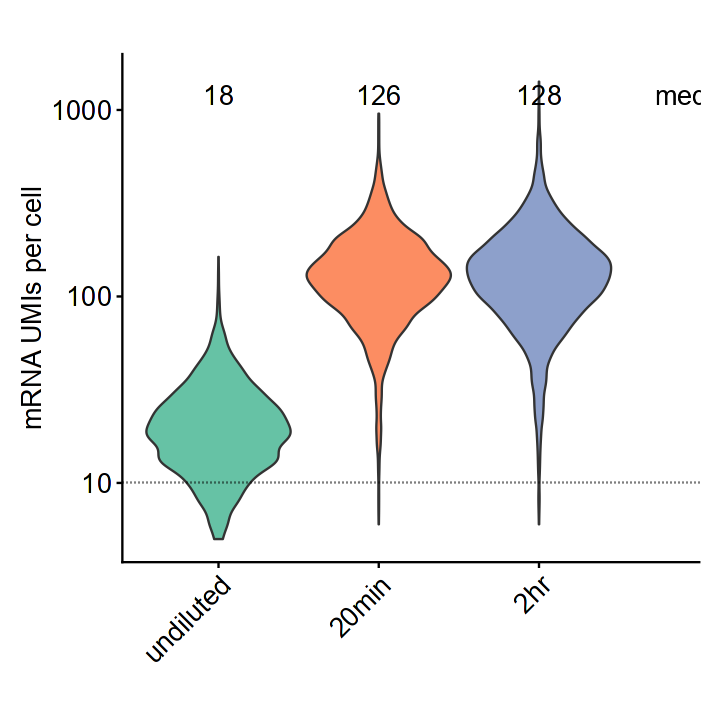

In [8]:
options(repr.plot.width=6, repr.plot.height=6)
my_cols = brewer.pal(7,"Set2")

idents <- c('t4_undil_WT_20210722','t4_20min_WT_20210722','t4_2hr_WT_20210722')
sub_seurat <- subset(seurat_preDS,idents=idents)
sub_seurat$cell.type <- droplevels(sub_seurat$cell.type)
sub_seurat$cell.type <- factor(sub_seurat$cell.type,levels=idents)
sub_seurat@active.ident <- sub_seurat$cell.type

p <- VlnPlot(sub_seurat, features = c("nCount_RNA"),ncol = 1, log=FALSE,pt.size=0) + 
    theme(legend.position = "none") + 
    scale_y_log10(limits = c(5,1500))

x <- 1
for (ident in idents){
    med <- median(subset(sub_seurat, idents=c(ident))$nCount_RNA)
    p <- p + annotate("text",x=x, y=1200, label=med, size=16 / .pt, family="Arial")
    x <- x+1
}
p <- p + scale_fill_manual(labels=c("undiluted","20min","2hr"),values=alpha(my_cols[1:3],1))
p <- p + annotate("text",x=4, y=1200, label='median', size=16 / .pt, family="Arial")
p <- p + scale_x_discrete(breaks=idents,labels=c("undiluted","20min","2hr"))
p <- p + theme(text=element_text(family= "Arial", size=16),axis.text = element_text(family= "Arial", size=16,angle = 0,hjust=0.5))
p <- p + ylab("mRNA UMIs per cell") + xlab('') + ggtitle('')
p <- p + geom_hline(yintercept=10,linetype='dotted')
p
ggsave('figures/figED1g.pdf')

table(seurat$cell.type)[idents]

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message:
“Removed 5389 rows containing non-finite outside the scale range (`stat_ydensity()`).”
Saving 6.67 x 6.67 in image
Warning message:
“Removed 5389 rows containing non-finite outside the scale range (`stat_ydensity()`).”



 WT_stat_20220331  WT_3min_20220331 WT_10min_20220331 WT_30min_20220331 
             1526             11563             11785             10058 
  WT_1hr_20220331 
            10708 

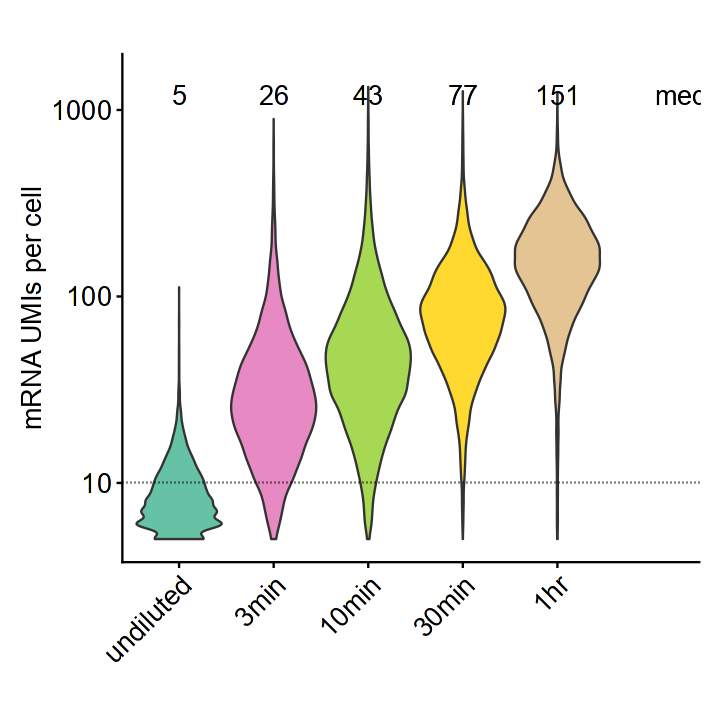

In [9]:
options(repr.plot.width=6, repr.plot.height=6)
my_cols = brewer.pal(7,"Set2")

idents <- c('WT_stat_20220331','WT_3min_20220331','WT_10min_20220331','WT_30min_20220331','WT_1hr_20220331')
sub_seurat <- subset(seurat_preDS,idents=idents)
sub_seurat$cell.type <- droplevels(sub_seurat$cell.type)
sub_seurat$cell.type <- factor(sub_seurat$cell.type,levels=idents)
sub_seurat@active.ident <- sub_seurat$cell.type

p <- VlnPlot(sub_seurat, features = c("nCount_RNA"),ncol = 1, log=FALSE,pt.size=0) + 
    theme(legend.position = "none") + 
    scale_y_log10(limits = c(5,1500))

x <- 1
for (ident in idents){
    med <- median(subset(sub_seurat, idents=c(ident))$nCount_RNA)
    p <- p + annotate("text",x=x, y=1200, label=med, size=16 / .pt, family="Arial")
    x <- x+1
}
p <- p + scale_fill_manual(labels=c("undiluted","3min","10min","30min","1hr"),values=alpha(my_cols[c(1,4:7)],1))
p <- p + annotate("text",x=6.5, y=1200, label='median', size=16 / .pt, family="Arial")
p <- p + scale_x_discrete(breaks=idents,labels=c("undiluted","3min","10min","30min","1hr"))
p <- p + theme(text=element_text(family= "Arial", size=16),axis.text = element_text(family= "Arial", size=16,angle = 0,hjust=0.5))
p <- p + ylab("mRNA UMIs per cell") + xlab('') + ggtitle('')
p <- p + geom_hline(yintercept=10,linetype='dotted')
p
ggsave('figures/figED1h.pdf')

table(seurat$cell.type)[idents]

[1] "metG_imm_abx_20230919"


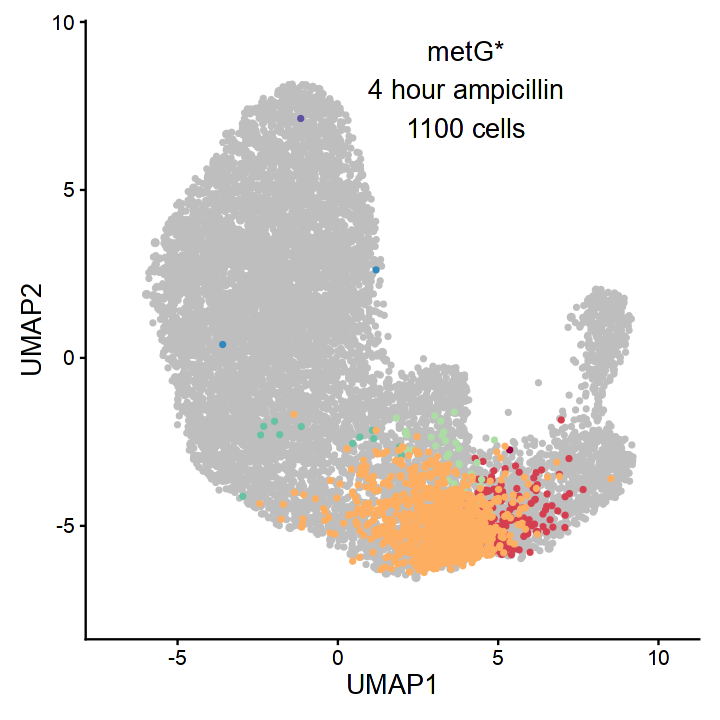

In [10]:
seurat_file = 'source_data/from_GEO/ds_seurat_PCA_UMAP_clusters_ds38_min10_v4.rds'
seurat_archive <- readRDS(seurat_file)

seurat <- seurat_archive
seurat@active.ident <- seurat$cell.type

ids = c('metG_imm_abx_20230919')
print(ids)

levels(seurat$seurat_clusters) = c(levels(seurat$seurat_clusters),'10')
seurat@active.ident <- seurat$cell.type
sub_seurat=subset(seurat,idents=ids)
seurat$seurat_clusters[!names(seurat$seurat_clusters) %in% names(sub_seurat$seurat_clusters)] = '10'


seurat@active.ident <- seurat$cell.type
options(repr.plot.width=6, repr.plot.height=6)
my_cols = brewer.pal(10,"Spectral")
n_cells_per = 1100
alpha = 1
pt.size = 1
xmin = min(seurat$umap@cell.embeddings[,'UMAP_1'])-1
xmax = max(seurat$umap@cell.embeddings[,'UMAP_1'])+1
ymin = min(seurat$umap@cell.embeddings[,'UMAP_2'])-1
ymax = max(seurat$umap@cell.embeddings[,'UMAP_2'])+1
sub_seurat$cell.type <- droplevels(sub_seurat$cell.type)
sampled.cells <- c()
set.seed(111)
for(id in levels(sub_seurat$cell.type)){
    sampled.cells <- c(sampled.cells,sample(x = names(subset(sub_seurat,idents=id)$cell.type), size = n_cells_per, replace = F))
}
seurat@active.ident <- seurat$seurat_clusters
sampled.cells <- c(sampled.cells,sample(x = names(subset(seurat,idents='10')$cell.type),size=10000,replace=FALSE))

alpha = c(0.1,1,1,1,1,1,1,1)
DimPlot(subset(seurat,cells=sampled.cells),pt.size=c(rep(1.5,1100),rep(1,10000)),order=rev(c('0','1','3','4','5','6','2'))) +
    xlim(xmin,xmax) + ylim(ymin,ymax) +
    scale_color_manual(labels = c('',"Early Stationary","Stationary","Early Lag","Late Lag","Early Exponential","Late Exponential","Persister"),values = alpha(c('gray',my_cols[c(1,2,7,8,9,10,4)]),alpha)) + xlab('UMAP1') + ylab('UMAP2') +
    theme(text=element_text(family= "Arial", size=16),legend.position='none',legend.title = element_text(face = "bold")) +
    annotate("text",x=4, y=8, label='metG*\n4 hour ampicillin\n1100 cells', size=16 / .pt, family="Arial")
ggsave('figures/figED1i_metG_imm_amp_umap.pdf',width = 6, height = 6)


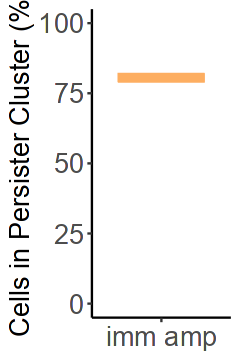

In [11]:
seurat <- seurat_archive
seurat@active.ident <- seurat$cell.type

ids = c('metG_imm_abx_20230919')
imm_list = c()
for (ident in ids){
  prop = prop.table(as.integer(table(subset(seurat,idents=ident)$seurat_clusters)))[3]
  imm_list = c(imm_list,prop)
}

fraction = c(imm_list)
l = c("imm amp") 
type = rep(l, c(length(imm_list)))
DATASET <- data.frame(fraction,type,stringsAsFactors = TRUE)


options(repr.plot.width=2, repr.plot.height=3)
set.seed(1)
DATASET$type <- factor(DATASET$type,levels=l)

ggplot(DATASET, aes(type, 100*fraction)) +
    geom_boxplot(colour = my_cols[4],lwd=2,fatten=1) +
    theme_classic()  + ylim(0,100) + 
    theme(
        axis.title.x = element_blank(),
        text=element_text(family= "Arial", size=16),
        axis.text.y = element_text(family= "Arial", size=16),
        axis.text.x = element_text(family= "Arial", size=16),
        axis.title.y = element_text(family= "Arial", size=16),
        legend.position='none') + ylab('Cells in Persister Cluster (%)')
ggsave('figures/figED1i_metG_boxplot.pdf',width = 8, height = 6)


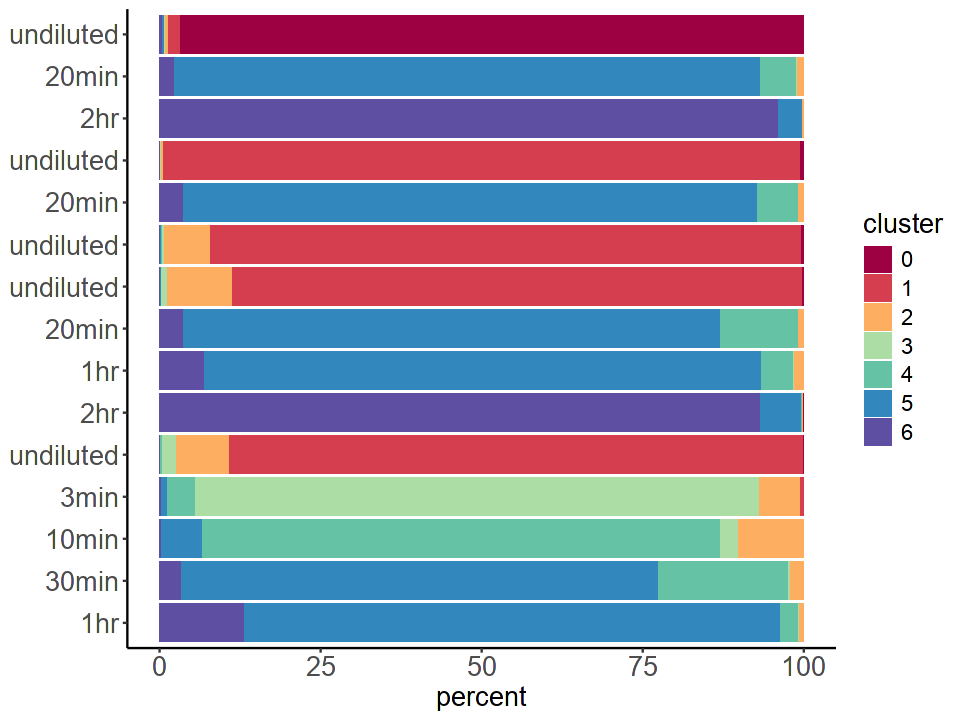

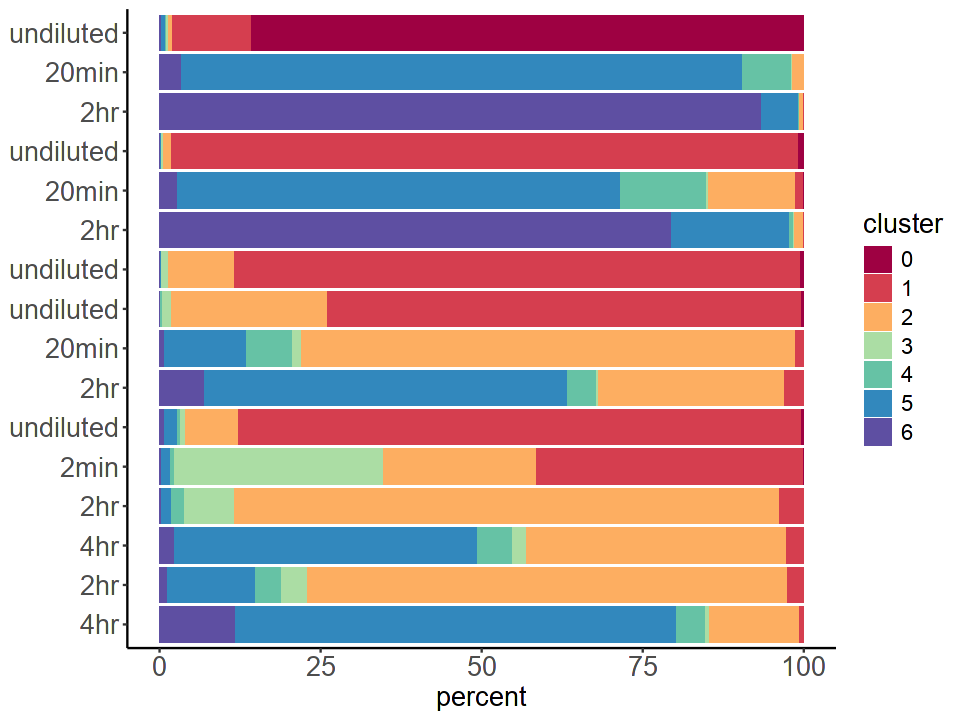

In [12]:
# R version 4.1.0 #
# Load packages: Seurat_4.1.1, RColorBrewer_1.1-3, ggplot2_3.3.6, extrafont_0.18,stringr_1.4.0 

packages = c('Seurat','RColorBrewer','ggplot2','extrafont','stringr')

for (p in packages){
    suppressPackageStartupMessages(eval(bquote(library(.(p)))))
}
bnum_table <- read.delim('source_data/included/ecoli_bnum_table_updated_2.txt',sep='\t')
get_gene_list <- function(name,seurat){
    bnums <- c()
    genes <- c()
    for (annotation_type in c('go','tf','sr')){
        data_name = str_replace("source_data/included/Ecoli_RENAME_index.txt","RENAME",annotation_type)
        data = readLines(data_name)
        for (line in data[grepl(name, data)]){
            bnum <- strsplit(line,'\t')[[1]][1]
            if (bnum %in% bnum_table[['bnum']]){
                gene <- bnum_table[bnum_table['bnum']==bnum,'gene']
                if (gene %in% rownames(seurat)){
                    bnums <- c(bnums,bnum)
                    genes <- c(genes,gene)
                }
            }
        }
    }
    return(genes)
}
seurat <- readRDS('source_data/from_GEO/ds_seurat_PCA_UMAP_clusters_ds38_min10_v4.rds') # download from GEO; also saved in seurat_ds38_min10_v4.R
to_include = c('t1_2hr_WT_20210722','t1_20min_WT_20210722','t1_undil_WT_20210722',
               't2_20min_WT_20210722','t2_undil_WT_20210722','t3_undil_WT_20210722',
               't4_2hr_WT_20210722','t4_1hr_WT_20210722','t4_20min_WT_20210722','t4_undil_WT_20210722',
               't1_2hr_metG_20210623','t1_20min_metG_20210623','t1_undil_metG_20210623',
               't2_2hr_metG_20210623','t2_20min_metG_20210623','t2_undil_metG_20210623','t3_undil_metG_20210623',
               't4_2hr_metG_20210623','t4_20min_metG_20210623','t4_undil_metG_20210623',
               'WT_1hr_20220331','WT_30min_20220331','WT_10min_20220331','WT_3min_20220331','WT_stat_20220331',
               'metG6_20201018_1','metG5_20201018_1','metG4_20201018_1','metG3_20201018_1','metG2_20200926','metG1_20200926','WT_10min_20220210')
seurat@active.ident <- seurat$cell.type
seurat <- subset(seurat,idents=to_include)

seurat@active.ident <- seurat$cell.type
ids = levels(seurat$cell.type)[(grepl('WT',levels(seurat$cell.type)))&(grepl('t1|t2|t3|t4|202203',levels(seurat$cell.type)))&(!grepl('quarter',levels(seurat$cell.type)))&(!grepl('WT_1hr_20220323_20220807',levels(seurat$cell.type)))]
my_cols = brewer.pal(10,"Spectral")
percentages_df <- data.frame(matrix(ncol = 3, nrow = length(ids) * length(levels(seurat$seurat_clusters))))
colnames(percentages_df) <- c('id','cluster','percent')
i = 1
for (id in ids){
    percentages_df[i:(i+6),'percent'] <- 100*prop.table(as.integer(table(subset(seurat, idents=c(id))$seurat_clusters)))
    percentages_df[i:(i+6),'id'] <- rep(id,7)
    percentages_df[i:(i+6),'cluster'] <- c(0:6)
    i = i + 7
}
percentages_df[,'id'] <- as.factor(percentages_df[,'id'])
percentages_df[,'id'] <- factor(percentages_df[,'id'],levels=rev(c('t1_undil_WT_20210722','t1_20min_WT_20210722','t1_2hr_WT_20210722','t2_undil_WT_20210722','t2_20min_WT_20210722','t3_undil_WT_20210722','t4_undil_WT_20210722','t4_20min_WT_20210722','t4_1hr_WT_20210722','t4_2hr_WT_20210722','WT_stat_20220331',"WT_3min_20220331","WT_10min_20220331","WT_30min_20220331","WT_1hr_20220331")))
idents = levels(percentages_df[,'id'])

options(repr.plot.width=8, repr.plot.height=6)
ggplot(percentages_df,aes(fill=factor(cluster),y=percent,x=id)) + geom_bar(position="stack", stat="identity") + 
    scale_fill_manual(values = my_cols[c(1,2,4,7,8,9,10)],name='cluster') +
    theme_classic() + coord_flip() + 
    scale_x_discrete(breaks=rev(idents),labels=c("undiluted","20min","2hr","undiluted","20min","undiluted","undiluted","20min","1hr","2hr","undiluted","3min","10min","30min","1hr")) +
    theme(
        axis.title.y=element_blank(),
        text=element_text(family= "Arial", size=16),
        axis.text.y = element_text(family= "Arial", size=16),
        axis.text.x = element_text(family= "Arial", size=16),
        axis.title.x = element_text(family= "Arial", size=16))

ggsave('figures/figED1l_WT_cluster_stacked_bar.pdf',width = 8,height = 6)

seurat@active.ident <- seurat$cell.type
ids = levels(seurat$cell.type)[(grepl('metG',levels(seurat$cell.type)))&(grepl('t1|t2|t3|t4|202009|202010',levels(seurat$cell.type)))&(!grepl('ICE',levels(seurat$cell.type)))]
my_cols = brewer.pal(10,"Spectral")
percentages_df <- data.frame(matrix(ncol = 3, nrow = length(ids) * length(levels(seurat$seurat_clusters))))
colnames(percentages_df) <- c('id','cluster','percent')
i = 1
for (id in ids){
    percentages_df[i:(i+6),'percent'] <- 100*prop.table(as.integer(table(subset(seurat, idents=c(id))$seurat_clusters)))
    percentages_df[i:(i+6),'id'] <- rep(id,7)
    percentages_df[i:(i+6),'cluster'] <- c(0:6)
    i = i + 7
}
percentages_df[,'id'] <- as.factor(percentages_df[,'id'])
percentages_df[,'id'] <- factor(percentages_df[,'id'],levels=rev(c('t1_undil_metG_20210623','t1_20min_metG_20210623','t1_2hr_metG_20210623','t2_undil_metG_20210623','t2_20min_metG_20210623','t2_2hr_metG_20210623','t3_undil_metG_20210623','t4_undil_metG_20210623','t4_20min_metG_20210623','t4_2hr_metG_20210623',"metG3_20201018_1","metG4_20201018_1","metG5_20201018_1","metG6_20201018_1","metG1_20200926","metG2_20200926")))
idents = levels(percentages_df[,'id'])

options(repr.plot.width=8, repr.plot.height=6)
ggplot(percentages_df,aes(fill=factor(cluster),y=percent,x=id)) + geom_bar(position="stack", stat="identity") + 
    scale_fill_manual(values = my_cols[c(1,2,4,7,8,9,10)],name='cluster') +
    theme_classic() + coord_flip() + 
    scale_x_discrete(breaks=rev(idents),labels=c("undiluted","20min","2hr","undiluted","20min","2hr","undiluted","undiluted","20min","2hr","undiluted","2min","2hr","4hr","2hr","4hr")) +
    theme(
        axis.title.y=element_blank(),
        text=element_text(family= "Arial", size=16),
        axis.text.y = element_text(family= "Arial", size=16),
        axis.text.x = element_text(family= "Arial", size=16),
        axis.title.x = element_text(family= "Arial", size=16))
ggsave('figures/figED1m_metG_cluster_stacked_bar.pdf',width = 8,height = 6)


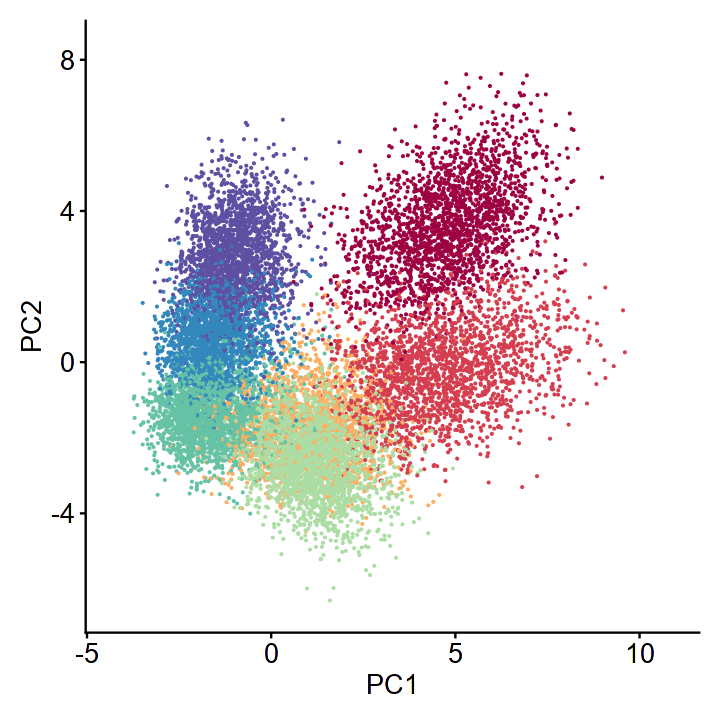

In [13]:
seurat@active.ident <- seurat$seurat_clusters
options(repr.plot.width=6, repr.plot.height=6)
my_cols = brewer.pal(10,"Spectral")
n_cells_per = 2000
alpha = 1
pt.size = 0.1
xmin = min(seurat$pca@cell.embeddings[,'PC_1'])
xmax = max(seurat$pca@cell.embeddings[,'PC_1'])
ymin = min(seurat$pca@cell.embeddings[,'PC_2'])
ymax = max(seurat$pca@cell.embeddings[,'PC_2'])

ids = levels(seurat$seurat_clusters)

sub_seurat=subset(seurat,idents=ids)
sampled.cells <- c()
set.seed(111)
for(id in levels(sub_seurat$seurat_clusters)){
    sampled.cells <- c(sampled.cells,sample(x = names(subset(sub_seurat,idents=id)$cell.type), size = n_cells_per, replace = F))
}

DimPlot(subset(sub_seurat,cells=sampled.cells),pt.size=pt.size,reduction='pca') +
    xlim(xmin,xmax) + ylim(ymin,ymax) +
    scale_color_manual(name='Cell Clusters',labels = c("Early Stationary", "Stationary","Persister","Early Lag","Late Lag","Early Exponential","Late Exponential"), values = alpha(my_cols[c(1,2,4,7,8,9,10)],alpha))+ xlab('PC1') + ylab('PC2') +
    theme(text=element_text(family= "Arial", size=16),axis.text=element_text(size=16),legend.position='none')
ggsave('figures/figED1n_clusters_pca.pdf',width = 6, height = 6)


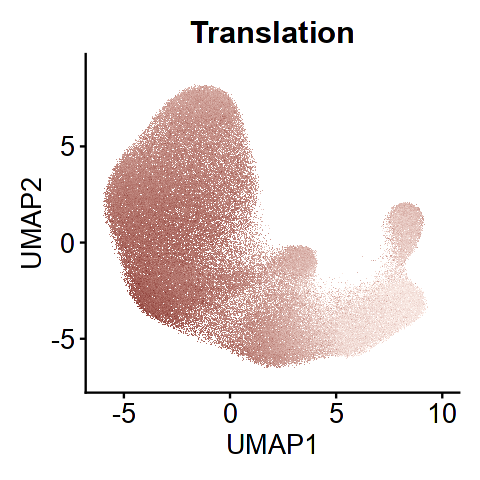

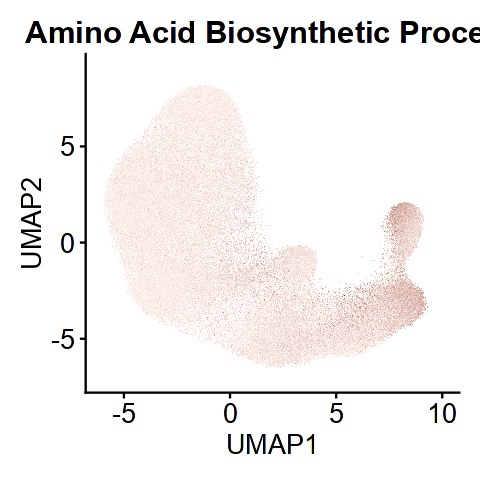

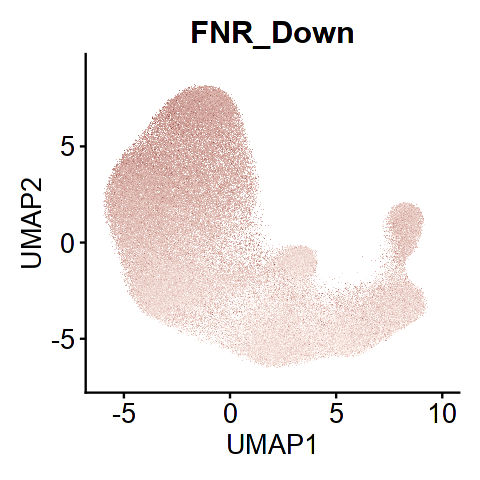

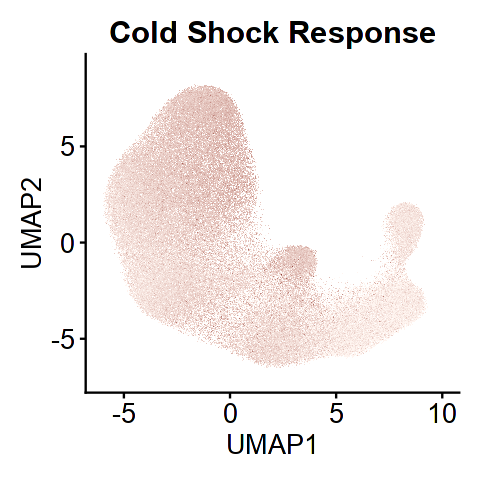

In [14]:
## save principal component loadings ##
## this is used in figure1_py notebook to save iPAGE input file and find the pathways below ##
write.table(seurat$pca@feature.loadings[,1:10],file = 'source_data/generated/atlas_PCA_loadings.txt',quote=FALSE,sep='\t')


## pathways were found using iPAGE, after saving input file in figure1_py notebook
all_terms <- c('GO:0006412','GO:0008652','FNR_Down','CoShReU') 
all_names <- c('Translation','Amino Acid Biosynthetic Process','FNR_Down','Cold Shock Response')

options(repr.plot.width=4, repr.plot.height=4)
my_cols = brewer.pal(9,"Reds")
my_cols = my_cols[c(1,length(my_cols))]


PC1_corrs <- c()
PC2_corrs <- c()
n_genes <- c()
for (i in 1:length(all_terms)){
    marker_list <- get_gene_list(all_terms[i],seurat)
    seurat$new.feat <- colMeans(seurat$RNA@data[marker_list,])
    p <- FeaturePlot(seurat, features = "new.feat", cols=my_cols,raster=TRUE) + ggtitle(all_names[i])
    p <- p + xlab('UMAP1') + ylab('UMAP2') +
        theme(text=element_text(family= "Arial", size=16),axis.text=element_text(size=16),legend.position='none')
    print(p)
    file_name <- paste(paste('figures/figED1o_',all_terms[i],sep=''),'.pdf',sep='')
    file_name <- str_replace(file_name,':','.')
    ggsave(file_name,width = 4,height = 4)
}


As of Seurat v5, we recommend using AggregateExpression to perform pseudo-bulk analysis.
This message is displayed once per session.
First group.by variable `ident` starts with a number, appending `g` to ensure valid variable names
This message is displayed once every 8 hours.


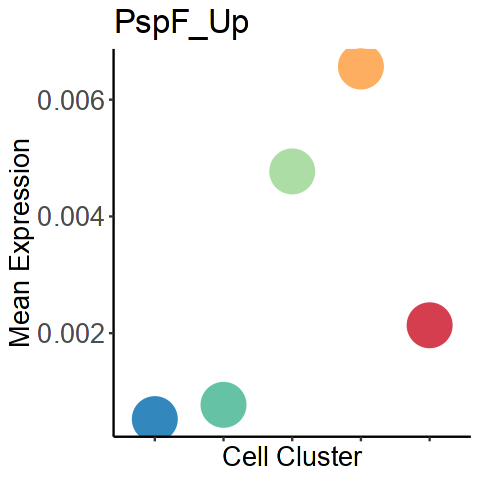

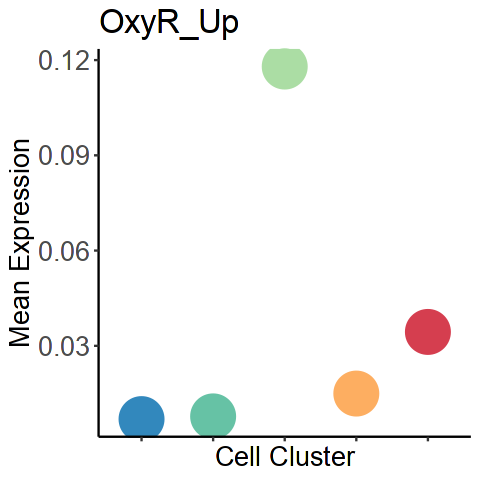

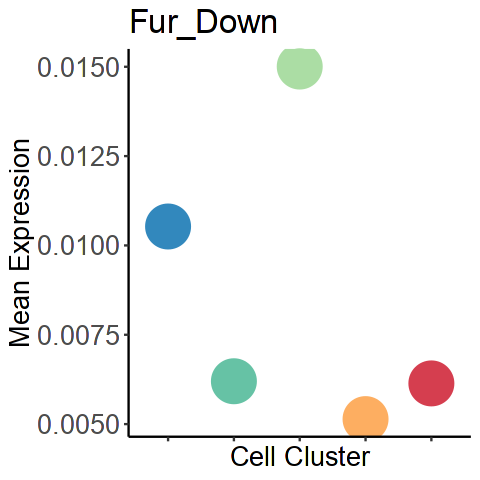

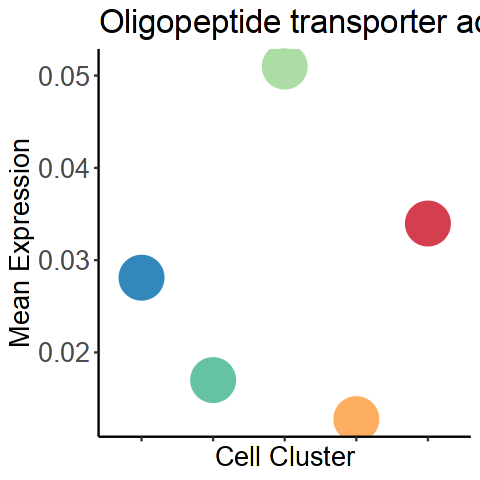

In [15]:
## pathways are found in figure1_py notebook and using iPAGE ##

options(repr.plot.width=4, repr.plot.height=4)
seurat@active.ident <- seurat$seurat_clusters
my_cols = brewer.pal(10,"Spectral")

all_terms <- c('PspF_Up','OxyR_Up','Fur_Down','GO:0015198') 
all_names <- c('PspF_Up','OxyR_Up','Fur_Down','Oligopeptide transporter activity')

for (i in 1:length(all_terms)){
    term = all_terms[i]
    marker_list <- get_gene_list(term,seurat) # get all genes in term
    marker_list <- unique(marker_list)
    term_avg <- colMeans(AverageExpression(seurat,slot='data',features=marker_list)$RNA)
    df <- data.frame(rev(term_avg))
    df['cluster'] = rev(c('0','1','2','3','4','5','6'))
    df['border'] = rev(c('0','1','2','3','4','5','6'))
    fill_colors = rev(my_cols[c(1,2,4,7,8,9,10)])
    labels = rev(c("Early Stationary","Stationary","Persister","Early Lag","Late Lag","Early Exponential","Late Exponential"))
    border_colors = fill_colors
    df <- df[2:6,]
    p <- ggplot(data=df, aes(x=cluster, y=term_avg[2:6],group=1,fill=border,color=border)) +
        geom_point(size=8,shape=21,stroke=3) + theme_classic() + scale_fill_manual(values=fill_colors[2:6],name='',labels=labels[2:6]) + 
        scale_color_manual(values=border_colors[2:6],name='',labels=labels) + 
        theme(text=element_text(family= "Arial", size=16),legend.position='none',
            axis.text.y = element_text(family= "Arial", size=16),
            axis.text.x = element_blank()) + 
        xlab('Cell Cluster') + ylab('Mean Expression') + ggtitle(all_names[i])
    file_name <- paste(paste('figures/figED1_',all_terms[i],sep=''),'.pdf',sep='')
    file_name <- str_replace(file_name,':','.')
    print(p)
    ggsave(file_name,width = 3,height = 4)
}